#**Introduction**

<img src='https://www.mymed.com/image/2383/medicalarticle/800'>

Diabetes is a chronic disease and a major challenge across the world. Hence, identifying factors associated with disease is very important. Accurate and fast diagnosis/prediction of the disease will help us to avoid any future complications associated with diabetes. There are certain populations which are very prone to different diseases in comparison to other populations

##**Aim of the project**

**To predict the accuracy of person wheather he /she is Diabetic or Non Diabetic by using Machine Learning Algorithm**

**Problem Statement** : predict of a person for Diabetic or Non Diabetic 

# Dataset Consists of

This dataset comes from the National Institute of Diabetes and Digestive and Kidney Diseases.

Variables used in the dataset

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

Blood Pressure: Diastolic blood pressure (mm Hg)

Skin Thickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

Diabetes Pedigree Function: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing libraries for data analysis


In [66]:
# Load the dataset
diabetes = pd.read_csv("/content/diabetes.csv",encoding= 'unicode_escape')

#EDA

In [67]:
diabetes.head()
#to display top 5 rows

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
diabetes.shape
# to see row and columns

(768, 9)

In [69]:
diabetes.columns
# to see column names

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', ' BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [70]:
diabetes.info()
#to see overall summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5    BMI                        768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
diabetes.describe()
# to show the statistical summary

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
diabetes.isnull().sum()
#to check any null values

 Pregnancies                  0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
 BMI                          0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

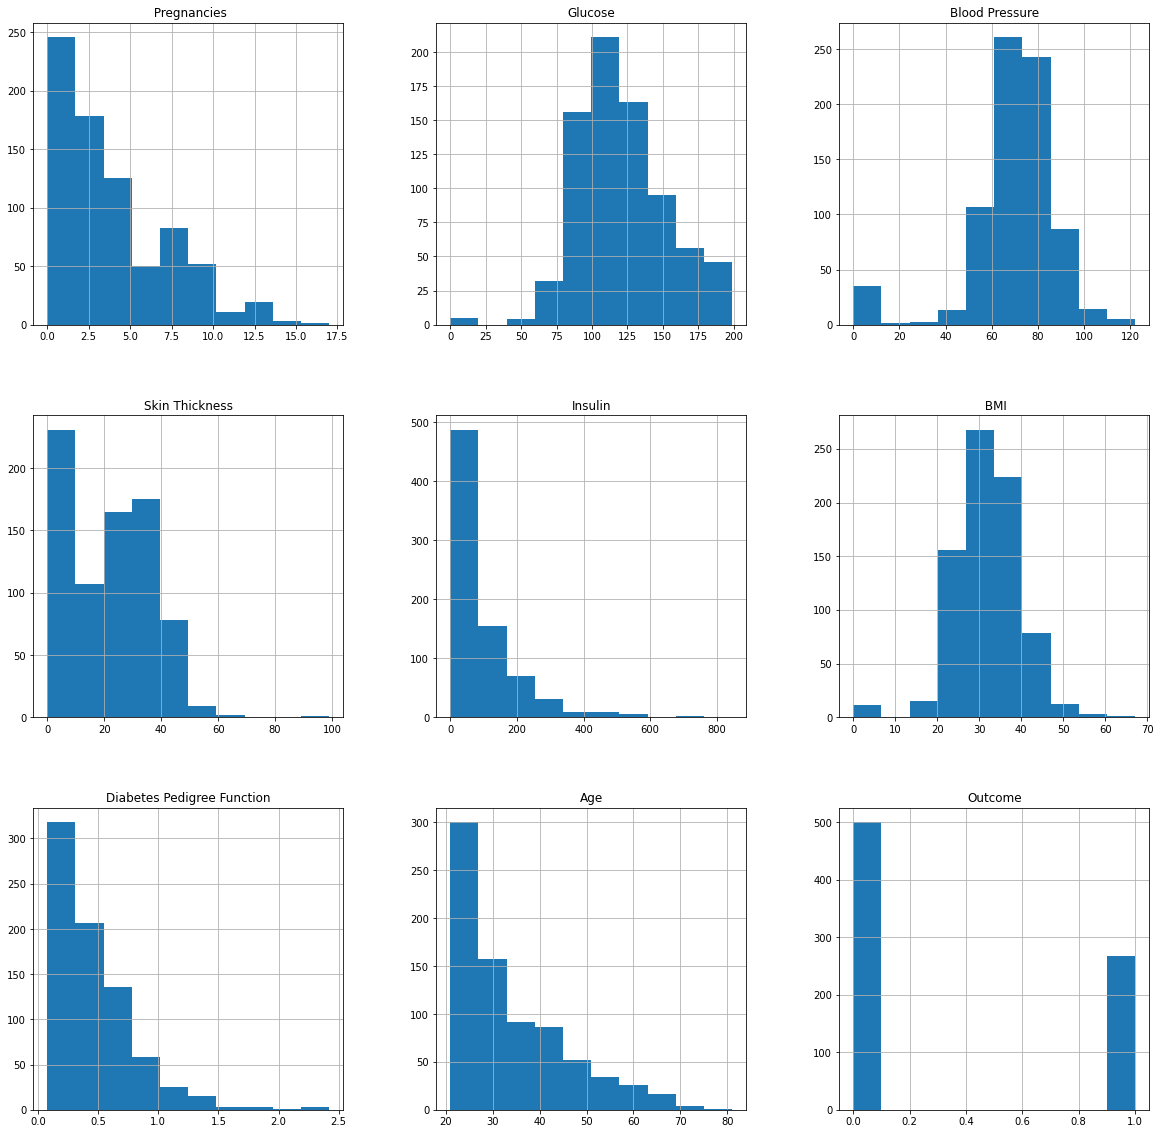

In [73]:
Histogram = diabetes.hist(figsize=(20,20))

Null values are present in form of zeroes

Observation:
In the above table, the min value of columns Glucose, BloodPressure, SkinThickness, Inssulin, BMI are zero (0) values. It is clear that those value can not be zero. Therefore, I am going to impute the values of these respective columns instead of zero in the next step.

In [74]:
diabetes.columns

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', ' BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [75]:
 # To deal Null Values
print('No. of zero values in Glucose is',diabetes [diabetes ['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure is',diabetes[diabetes['Blood Pressure']==0].shape[0])
print('No. of zero values in SkinThickness is',diabetes[diabetes['Skin Thickness']==0].shape[0])
print('No. of zero values in Insulin is',diabetes[diabetes['Insulin']==0].shape[0])
print('No. of zero values in BMI is',diabetes[diabetes[' BMI']==0].shape[0])

No. of zero values in Glucose is 5
No. of zero values in BloodPressure is 35
No. of zero values in SkinThickness is 227
No. of zero values in Insulin is 374
No. of zero values in BMI is 11


In [76]:
# Replace the zero values with mean of that columns
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes['Blood Pressure']=diabetes['Blood Pressure'].replace(0,diabetes['Blood Pressure'].mean())
diabetes['Skin Thickness']=diabetes['Skin Thickness'].replace(0,diabetes['Skin Thickness'].mean())
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes[' BMI']=diabetes[' BMI'].replace(0,diabetes[' BMI'].mean())

In [77]:
 # To deal Null Values
print('No. of zero values in Glucose is',diabetes [diabetes ['Glucose']==0].shape[0])
print('No. of zero values in BloodPressure is',diabetes[diabetes['Blood Pressure']==0].shape[0])
print('No. of zero values in SkinThickness is',diabetes[diabetes['Skin Thickness']==0].shape[0])
print('No. of zero values in Insulin is',diabetes[diabetes['Insulin']==0].shape[0])
print('No. of zero values in BMI is',diabetes[diabetes[' BMI']==0].shape[0])

No. of zero values in Glucose is 0
No. of zero values in BloodPressure is 0
No. of zero values in SkinThickness is 0
No. of zero values in Insulin is 0
No. of zero values in BMI is 0


In [78]:
# Check with statiscal summary
diabetes.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Check the imbalanced dataset

In [79]:
diabetes["Outcome"].value_counts().to_frame()

,Outcome
0,500
1,268


In [80]:
diabetes["Outcome"].value_counts(normalize=True).to_frame()

,Outcome
0,0.651042
1,0.348958


0 -> Non-diabetic. 1 -> Diabetic. Only 34.8% people which have diabete. So the data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance

 # Data visualization

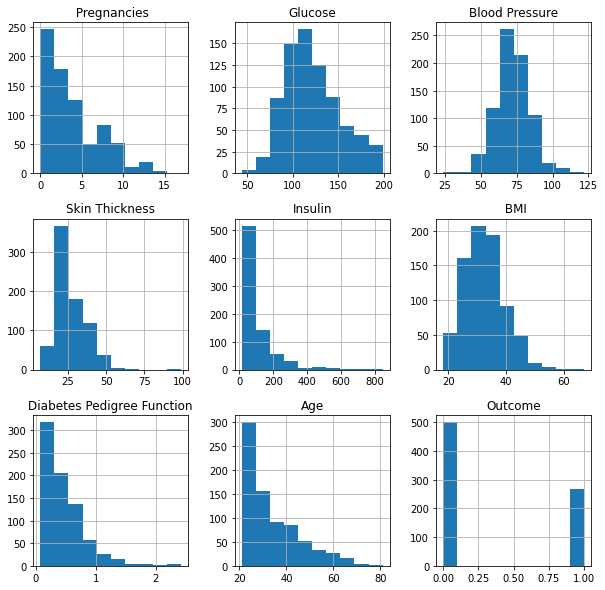

In [81]:
# Histogram of each feature
diabetes.hist(figsize = (10,10),bins=10)
plt.show()

 # Analyzing relationships between variables

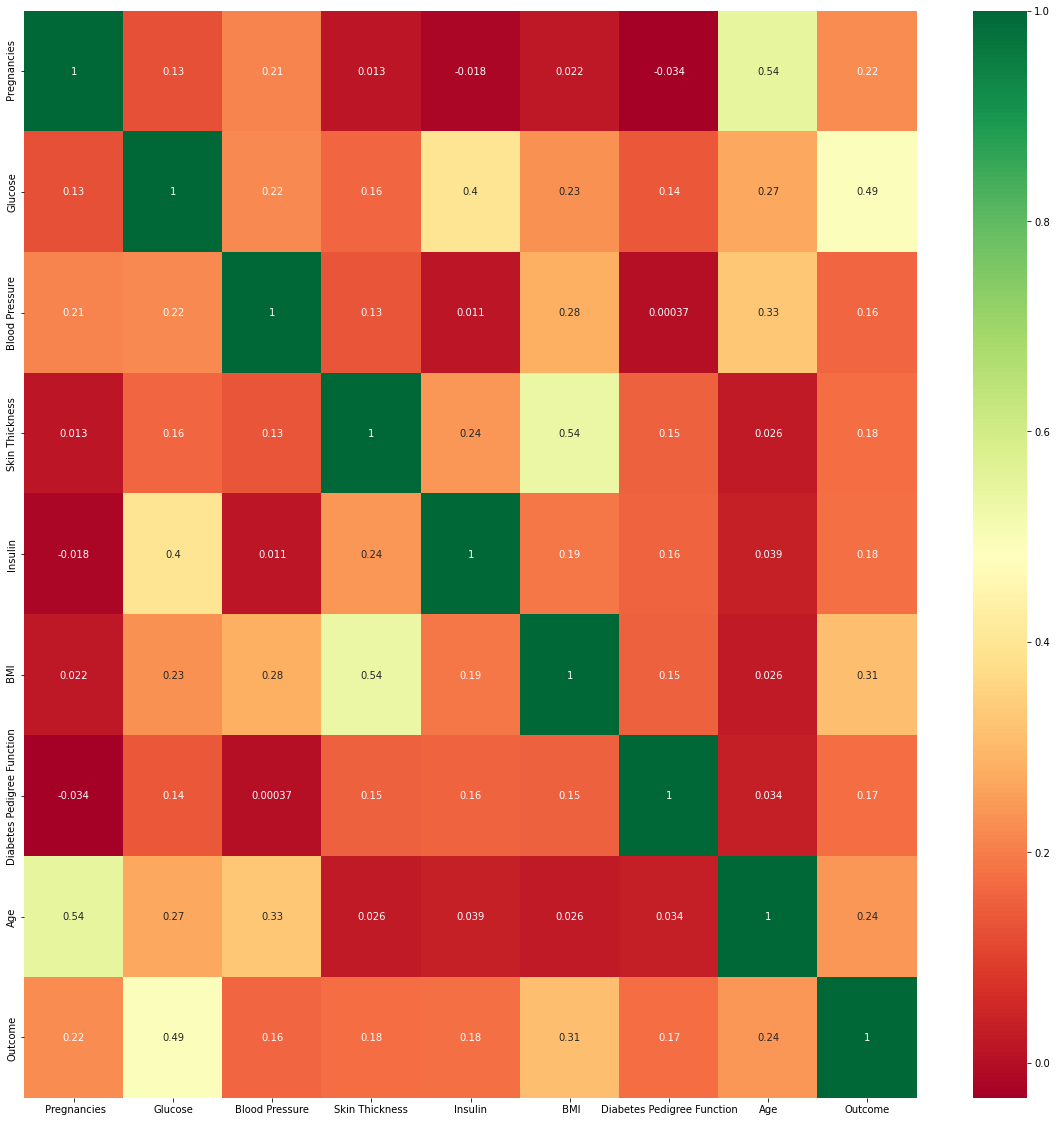

In [82]:
# get correlation of each features in dataset
cormat = diabetes.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
# plot heat map
g = sns.heatmap(diabetes[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [83]:
diabetes.corr()
#correlation

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
Blood Pressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
Skin Thickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
Diabetes Pedigree Function,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


# Split the data frame into X and y

In [84]:
target_name = 'Outcome'

# Separate object for target feature
y = diabetes[target_name]

# Separate object for input features

X = diabetes.drop(target_name, axis=1)

In [85]:
X.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [86]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Apply Feature Scaling

There are some feature scaling: StandardScaler, Normalizer, Minmax Scaler and Binarizer. In this project, I use StandardScaler for scaling the feature.

In [87]:
# Apply Stadard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

# Train test split

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

#importing machine learning sklearn package

In [89]:
X_train.shape, y_train.shape
#printing training shapes

((614, 8), (614,))

In [90]:
X_test.shape, y_test.shape
#printing testing shapes

((154, 8), (154,))

# Build the Algorithm

## **Logistic Regression**

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

#printing and defining Logistic Regression

LogisticRegression(multi_class='ovr', solver='liblinear')

## **KNeighborsClassifier (KNN)**

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

#printing and defining KNeighborsClassifier (KNN)

KNeighborsClassifier()

## **Naive-Bayes Classifier**

In [93]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)

#printing and defining Naive-Bayes Classifier

GaussianNB()

## **Support Vector Machine**

In [96]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, y_train)

#printing and defining Support Vector Machine

SVC()

## **Decision Tree**

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

#printing and defining Decision Tree

DecisionTreeClassifier()

## **Random Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)

#printing and defining Random Forest

RandomForestClassifier(criterion='entropy')

# **Making prediction**

1. **Making prediction on test by using logistic Regression**

In [97]:
## Making prediction on test dataset
lr_pred=lr.predict(X_test)

Making prediction on test by using KNN

In [98]:
## Making prediction on test dataset
knn_pred=knn.predict(X_test)

**2. Making prediction on test by using Naive-Bayes Classifier**

In [99]:
## Making prediction on test dataset
nb_pred=nb.predict(X_test)

**3. Making prediction on test using SVM**

In [100]:
## Making prediction on test dataset
sv_pred=sv.predict(X_test)

**4. Making prediction on test using Decision Tree**

In [101]:
## Making prediction on test dataset
dt_pred=dt.predict(X_test)

**5. Making prediction on test using Random Forest**

In [102]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

# **Model evaluation**

In [103]:
# Train score and Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lr.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lr_pred))

Train accuracy of Logistic Regression is 0.7736156351791531
Accuracy (Test) score of Logistic Regression is 0.7727272727272727
Accuracy (Test) score of Logistic Regression is 0.7727272727272727


In [104]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

Train accuracy of KNN is 0.8110749185667753
Accuracy (Test) score of KNN is 0.7467532467532467
Accuracy (Test) score of KNN is 0.7467532467532467


In [105]:
# Train score and Test score of Naive-Bayes
print("Train accuracy of Naive-Bayes is", nb.score(X_train, y_train))
print("Accuracy (Test) score of Naive-Bayes is", nb.score(X_test, y_test))
print("Accuracy (Test) score of Naive-Bayes is", accuracy_score(y_test, nb_pred))

Train accuracy of Naive-Bayes is 0.742671009771987
Accuracy (Test) score of Naive-Bayes is 0.7402597402597403
Accuracy (Test) score of Naive-Bayes is 0.7402597402597403


In [106]:
# Train score and Test score of SVM
print("Train accuracy of SVM is", sv.score(X_train, y_train))
print("Accuracy (Test) score of SVM is", sv.score(X_test, y_test))
print("Accuracy (Test) score of SVM is", accuracy_score(y_test, sv_pred))

Train accuracy of SVM is 0.8192182410423453
Accuracy (Test) score of SVM is 0.8311688311688312
Accuracy (Test) score of SVM is 0.8311688311688312


In [107]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

Train accuracy of Decision Tree is 1.0
Accuracy (Test) score of Decision Tree is 0.8051948051948052
Accuracy (Test) score of Decision Tree is 0.8051948051948052


In [108]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

Train accuracy of Random Forest is 1.0
Accuracy (Test) score of Random Forest is 0.7987012987012987
Accuracy (Test) score of Random Forest is 0.7987012987012987


## **Conclusion**

**According to the highest accuracy of test score , we should consider 2 models below to apply for this project:**

1. **Support Vector Machine: - Accuracy of test score: 0.8312**
2. **Decision Tree: - Accuracy of test score: 0.8182** 